In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset
books = pd.read_csv(r"C:\Users\Rajashri\Desktop\Resume\Resume Projects\Book Recommender\books.csv", sep=";", 
                    error_bad_lines=False, encoding="latin-1")
ratings = pd.read_csv(r"C:\Users\Rajashri\Desktop\Resume\Resume Projects\Book Recommender\ratings.csv", sep=";", 
                    error_bad_lines=False, encoding="latin-1")
users = pd.read_csv(r"C:\Users\Rajashri\Desktop\Resume\Resume Projects\Book Recommender\users.csv", sep=";", 
                    error_bad_lines=False, encoding="latin-1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [3]:
print(books.shape)
books.head(5)

(271360, 8)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
print(users.shape)
users.head(5)

(278858, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
print(ratings.shape)
ratings.head(5)

(1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Cleaning the data

#### Explore Books dataset

In [6]:
books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [7]:
# Let's check if any null values are present
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
# Let's drop these columns
books.dropna(inplace=True)

In [9]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271354 non-null  object
 1   Book-Title           271354 non-null  object
 2   Book-Author          271354 non-null  object
 3   Year-Of-Publication  271354 non-null  object
 4   Publisher            271354 non-null  object
 5   Image-URL-S          271354 non-null  object
 6   Image-URL-M          271354 non-null  object
 7   Image-URL-L          271354 non-null  object
dtypes: object(8)
memory usage: 18.6+ MB


In [11]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [12]:
# Change the datatype of year of publication as integer
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int32')
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int32
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [13]:
# Let's check if any duplicate values are present
books.duplicated().sum()

0

#### Explore Users dataset

In [14]:
users.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [15]:
# Let's check if any null values are present
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [16]:
# Exploring the 'Age' column
print(sorted(users['Age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [17]:
# Age column has some invalid entries like nan, 0 and very high values like 100+
# Age below 5 and above 90 do not make much sense for our book rating case, so replacing by NaN
users.loc[(users['Age'] > 90) | (users['Age'] < 5), 'Age'] = np.nan

In [18]:
# Replace all null 'Age' values with mean now
users['Age'] = users['Age'].fillna(users['Age'].mean())

In [19]:
# Setting the data type as int
users['Age'] = users['Age'].astype(np.int32)

In [20]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [21]:
users.dtypes

User-ID      int64
Location    object
Age          int32
dtype: object

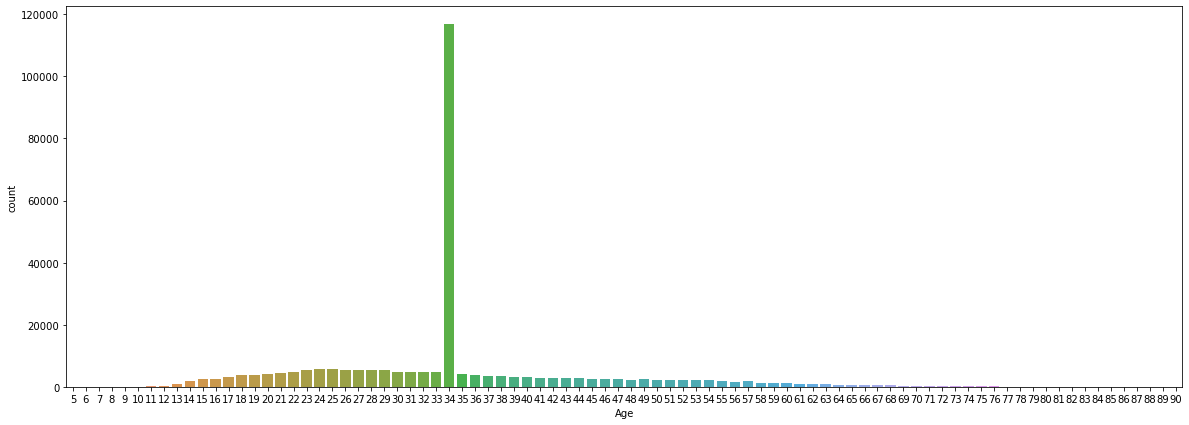

In [22]:
# Let's visualize count of Age
plt.figure(figsize=(20,7))
sns.countplot(data=users , x='Age')
plt.show()

In [23]:
# Let's check if any duplicate values are present
users.duplicated().sum()

0

#### Explore Ratings dataset

In [24]:
ratings.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [25]:
# Let's check if any null values are present
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [26]:
# We need to subset ratings data to only those books which are present in our data
ratings_df = ratings[ratings['ISBN'].isin(books['ISBN'])]

In [27]:
print(ratings.shape)
print(ratings_df.shape)

(1149780, 3)
(1031129, 3)


In [28]:
ratings_df['Book-Rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

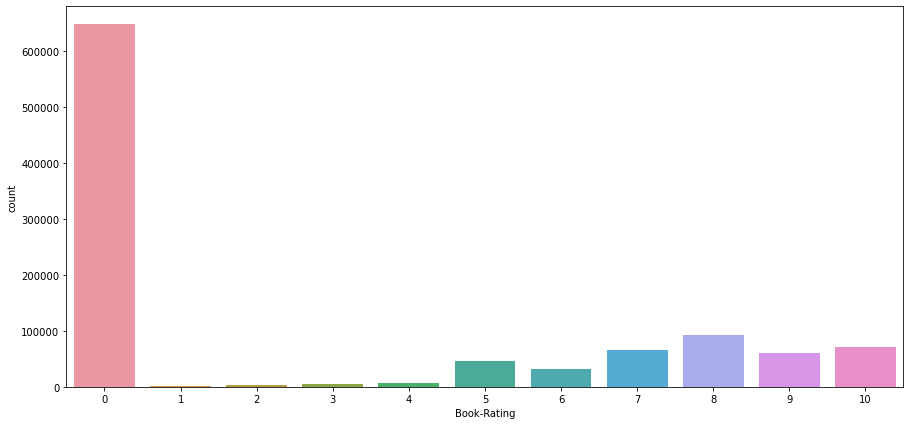

In [29]:
# Let's visualize count of bookRating
plt.figure(figsize=(15,7))
sns.countplot(data=ratings_df , x='Book-Rating')
plt.show()

In [30]:
ratings_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [31]:
# Let's check if any duplicate values are present
ratings_df.duplicated().sum()

0

### Popularity Based Recommendation System

#### Only consider those books which have atleast 250 ratings

In [32]:
# Merge 'books' and 'ratings' dataframes
ratings_new = ratings_df.merge(books, on='ISBN')

In [33]:
print(ratings_new.shape)
ratings_new.head(5)

(1031129, 10)


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


#### Get the total number of ratings for each book 

In [34]:
book_rating_df = ratings_new.groupby('Book-Title').count()['Book-Rating'].reset_index()
book_rating_df

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241061,Ã?Â?lpiraten.,2
241062,Ã?Â?rger mit Produkt X. Roman.,4
241063,Ã?Â?sterlich leben.,1
241064,Ã?Â?stlich der Berge.,3


In [35]:
book_rating_df.rename(columns={'Book-Rating':'num_ratings'}, inplace=True)

In [36]:
book_rating_df.head(5)

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


#### Get the average rating for each book

In [37]:
book_avg_rating_df = ratings_new.groupby('Book-Title').mean()['Book-Rating'].reset_index()
book_avg_rating_df

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241061,Ã?Â?lpiraten.,0.000000
241062,Ã?Â?rger mit Produkt X. Roman.,5.250000
241063,Ã?Â?sterlich leben.,7.000000
241064,Ã?Â?stlich der Berge.,2.666667


In [38]:
book_avg_rating_df.rename(columns={'Book-Rating':'avg_ratings'}, inplace=True)

In [39]:
book_avg_rating_df.head(5)

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [40]:
# Merging both the dataframes
popularity_df = book_rating_df.merge(book_avg_rating_df, on='Book-Title')
popularity_df

,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241061,Ã?Â?lpiraten.,2,0.000000
241062,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241063,Ã?Â?sterlich leben.,1,7.000000
241064,Ã?Â?stlich der Berge.,3,2.666667


#### Get the top 100 most popular books

In [41]:
# For more accurate results, we will only consider those books which have atleast 250 ratings
popular_df = popularity_df[popularity_df['num_ratings'] >= 250]
popular_df = popular_df.sort_values('avg_ratings', ascending=False).head(100).reset_index(drop=True)

In [42]:
print(popular_df.shape)
popular_df

(100, 3)


,Book-Title,num_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
1,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
2,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
3,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
4,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
...,...,...,...
95,The Beach House,435,3.347126
96,The Hours: A Novel,294,3.346939
97,Icy Sparks,309,3.346278
98,Angela's Ashes (MMP) : A Memoir,326,3.337423


In [43]:
# Merge it with the 'books' dataframe
book_df = popular_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')
book_df = book_df[['Book-Title','Book-Author','Publisher','Image-URL-M','num_ratings','avg_ratings']]
book_df = book_df.reset_index(drop=True)

In [44]:
print(book_df.shape)
book_df.head(10)

(100, 6)


,Book-Title,Book-Author,Publisher,Image-URL-M,num_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
1,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
2,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
3,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
4,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
5,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,Del Rey,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
6,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,Del Rey,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
7,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
8,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,Del Rey,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
9,To Kill a Mockingbird,Harper Lee,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


### Collaborative Filtering Based Recommendation System

#### Only consider users who have rated atleast 200 books

In [45]:
ratings_new.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [46]:
# For more accurate results, we will only consider users who have rated atleast 200 books
ratings_new.groupby('User-ID').count()['Book-Rating'].reset_index()

,User-ID,Book-Rating
0,2,1
1,8,17
2,9,3
3,10,1
4,12,1
...,...,...
92101,278846,1
92102,278849,4
92103,278851,23
92104,278852,1


In [47]:
ratings_explicit = ratings_new.groupby('User-ID').count()['Book-Rating'] >= 200

In [48]:
reqd_users = ratings_explicit[ratings_explicit].index
reqd_users

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=816)

In [49]:
filtered_ratings = ratings_new[ratings_new['User-ID'].isin(reqd_users)]
filtered_ratings = filtered_ratings.reset_index(drop=True)

In [50]:
print(filtered_ratings.shape)
filtered_ratings.head(5)

(475003, 10)


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


#### Out of these, only consider those books which have atleast 50 ratings

In [51]:
# For more accurate results, we will only consider those books which have atleast 50 ratings
filtered_ratings.groupby('Book-Title').count()['Book-Rating'].reset_index()

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
156129,Ã?Â?ber das Fernsehen.,2
156130,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
156131,Ã?Â?lpiraten.,1
156132,Ã?Â?stlich der Berge.,1


In [52]:
filtered_ratings_explicit = filtered_ratings.groupby('Book-Title').count()['Book-Rating'] >= 50

In [53]:
reqd_books = filtered_ratings_explicit[filtered_ratings_explicit].index
reqd_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=707)

In [54]:
final_ratings = filtered_ratings[filtered_ratings['Book-Title'].isin(reqd_books)]
final_ratings = final_ratings.reset_index(drop=True)

In [55]:
print(final_ratings.shape)
final_ratings.head(5)

(58823, 10)


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
1,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
2,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
4,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...


In [56]:
# Let's check if any duplicate values are present
final_ratings.duplicated().sum()

0

#### Generate matrix table

In [57]:
ratings_matrix = final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')
print(ratings_matrix.shape)
ratings_matrix.head(5)

(707, 815)


User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
ratings_matrix.fillna(0, inplace=True)
ratings_matrix.head(5)

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Calculate 'Cosine' Similarity of a  book with every other book

In [59]:
# Consider each book as a vector in a 815 dimensional vector space
# We need to find similar vectors/books

In [60]:
# Cosine Similarity is a measure of similarity, often used to measure document similarity in text analysis.
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(ratings_matrix)
print(similarity.shape)

(707, 707)


In [61]:
# similarity matrix for book1
similarity[0]

array([1.        , 0.0999137 , 0.01189468, 0.        , 0.05229234,
       0.02703559, 0.08005247, 0.133798  , 0.03177829, 0.03573298,
       0.0226271 , 0.06592522, 0.020304  , 0.09425025, 0.1304464 ,
       0.08089641, 0.10866788, 0.0496928 , 0.02453052, 0.11405415,
       0.        , 0.13965274, 0.07645776, 0.05992325, 0.08499677,
       0.        , 0.06829594, 0.13307519, 0.07404925, 0.11854319,
       0.007483  , 0.01435345, 0.        , 0.07761015, 0.04406341,
       0.0151626 , 0.09251799, 0.01776199, 0.02543351, 0.07778745,
       0.11379679, 0.0554492 , 0.08139372, 0.08254087, 0.08560054,
       0.05350252, 0.0534403 , 0.26331669, 0.09527704, 0.05861375,
       0.08728505, 0.06575169, 0.        , 0.04353225, 0.01871487,
       0.        , 0.05484345, 0.00531237, 0.07674541, 0.05085288,
       0.18422052, 0.        , 0.01208759, 0.0290784 , 0.04169477,
       0.12354122, 0.16140808, 0.        , 0.1301383 , 0.06445396,
       0.        , 0.        , 0.        , 0.10686088, 0.02734

In [62]:
# similarity matrix for book2
similarity[1]

array([0.0999137 , 1.        , 0.2364573 , 0.        , 0.1095379 ,
       0.10092909, 0.11786249, 0.18761978, 0.09658879, 0.04716095,
       0.09790994, 0.07830823, 0.19121955, 0.04828673, 0.11297907,
       0.11424415, 0.11290848, 0.08432401, 0.05619509, 0.09820417,
       0.17562977, 0.05779941, 0.15727218, 0.05719732, 0.11374482,
       0.        , 0.09515326, 0.08104912, 0.02894774, 0.07225874,
       0.01714222, 0.03288122, 0.04211669, 0.09380106, 0.04486288,
       0.25375719, 0.04682287, 0.20897363, 0.05826367, 0.30746648,
       0.05386542, 0.06892792, 0.04503831, 0.074284  , 0.13507508,
       0.05023148, 0.02267079, 0.06552582, 0.05644729, 0.06294081,
       0.07553841, 0.05578722, 0.        , 0.19483247, 0.07717041,
       0.01504361, 0.10744436, 0.05273534, 0.08539351, 0.10668897,
       0.11024468, 0.        , 0.02769053, 0.23980848, 0.08922627,
       0.04639526, 0.04350087, 0.09616002, 0.1153737 , 0.01531666,
       0.13588642, 0.03504529, 0.12520455, 0.12647968, 0.10989

#### Let's understand how to recommend books

In [63]:
# Book name -> Book Index -> Similarity matrix Index -> Sort -> Fetch books

In [64]:
# Get index of a book
s1 = np.where(ratings_matrix.index=='2nd Chance')[0][0]
s1

2

In [65]:
# Get the list of cosine similarity scores for that particular book with all other books
dist = similarity[s1]
dist

array([0.01189468, 0.2364573 , 1.        , 0.        , 0.06909024,
       0.10559126, 0.        , 0.10774375, 0.06702185, 0.04168195,
       0.04772156, 0.        , 0.04758005, 0.04445515, 0.05200706,
       0.09877662, 0.06505525, 0.16998812, 0.11381916, 0.11713888,
       0.03424097, 0.08780144, 0.19734903, 0.        , 0.10296667,
       0.        , 0.05862648, 0.03167738, 0.02665072, 0.0927721 ,
       0.01578198, 0.11200668, 0.07976511, 0.09795366, 0.11151806,
       0.13297767, 0.07759342, 0.09490079, 0.10728083, 0.098855  ,
       0.05052686, 0.04079472, 0.        , 0.02486892, 0.10177107,
       0.04624558, 0.16514854, 0.0387812 , 0.04734877, 0.05537103,
       0.05389246, 0.        , 0.        , 0.17478183, 0.16630236,
       0.        , 0.03372225, 0.09187298, 0.20224734, 0.14105132,
       0.1393888 , 0.09040688, 0.02549327, 0.1202022 , 0.03908273,
       0.04271377, 0.04004905, 0.11285355, 0.02240551, 0.01410128,
       0.03325543, 0.11062089, 0.05800659, 0.15450668, 0.07858

In [66]:
# Sort the books acc. to similarities
sorted(dist, reverse=True)

[0.9999999999999999,
 0.3918276378683357,
 0.34991368995007677,
 0.30619341327105154,
 0.2946892769829446,
 0.2744597369070355,
 0.26840230908242607,
 0.26814324064048733,
 0.2524098979487631,
 0.2508772113214677,
 0.24966039143931953,
 0.24923306067547388,
 0.24169010979761998,
 0.2380506201999118,
 0.236457295254443,
 0.2331269920232123,
 0.2291408558371912,
 0.22709354851686991,
 0.22646115140179204,
 0.22450441281018976,
 0.22027645398763274,
 0.21947561844756477,
 0.21765288149629525,
 0.21708609119306566,
 0.21433446878135595,
 0.21315996596970335,
 0.2123999887154975,
 0.2120225298487869,
 0.2050466947483047,
 0.20478283997913724,
 0.20472881278193272,
 0.2030148440637205,
 0.2024610567904854,
 0.20224734136070588,
 0.20172489588333678,
 0.20040121777382794,
 0.19788302055557988,
 0.19734903096369646,
 0.1967119920532228,
 0.1919001352617918,
 0.1913493936308287,
 0.18887898686380208,
 0.1882604117711073,
 0.18626881716301838,
 0.18405817043693082,
 0.18402900506260964,
 0.18368

In [67]:
# When we will sort the books acc. to similarity, we lose its index, but we need to maintain its index always
sorted(list(enumerate(dist)), reverse=True)

[(706, 0.1079611914311691),
 (705, 0.049385791533561194),
 (704, 0.045587578351537296),
 (703, 0.1656538343598668),
 (702, 0.06854925775063085),
 (701, 0.018696937105180188),
 (700, 0.14858007838291573),
 (699, 0.01990556530144038),
 (698, 0.18308899484636132),
 (697, 0.1534725400465305),
 (696, 0.11971237469680196),
 (695, 0.10751659010568584),
 (694, 0.13192467915260706),
 (693, 0.09665604202955407),
 (692, 0.05951321903788643),
 (691, 0.06517880897029618),
 (690, 0.06742189117417269),
 (689, 0.1225601444062686),
 (688, 0.0),
 (687, 0.03346845261642947),
 (686, 0.05554551563312146),
 (685, 0.04614828464976071),
 (684, 0.06798299228737838),
 (683, 0.1728265086907308),
 (682, 0.0),
 (681, 0.06803454683269929),
 (680, 0.10310407388723912),
 (679, 0.12671149393870398),
 (678, 0.02655969632728115),
 (677, 0.08662062998500919),
 (676, 0.04077318400872556),
 (675, 0.05210897586426607),
 (674, 0.07298232356849081),
 (673, 0.06600718420188237),
 (672, 0.09085796374978966),
 (671, 0.0358675689

In [68]:
# Sorting has been done acc. to index, which we don't want, we want ot sort acc. to similarity scores
sorted(list(enumerate(dist)), reverse=True, key=lambda x:x[1])

[(2, 0.9999999999999999),
 (203, 0.3918276378683357),
 (578, 0.34991368995007677),
 (667, 0.30619341327105154),
 (576, 0.2946892769829446),
 (198, 0.2744597369070355),
 (338, 0.26840230908242607),
 (96, 0.26814324064048733),
 (166, 0.2524098979487631),
 (368, 0.2508772113214677),
 (486, 0.24966039143931953),
 (382, 0.24923306067547388),
 (81, 0.24169010979761998),
 (130, 0.2380506201999118),
 (1, 0.236457295254443),
 (583, 0.2331269920232123),
 (427, 0.2291408558371912),
 (193, 0.22709354851686991),
 (496, 0.22646115140179204),
 (483, 0.22450441281018976),
 (205, 0.22027645398763274),
 (80, 0.21947561844756477),
 (172, 0.21765288149629525),
 (352, 0.21708609119306566),
 (519, 0.21433446878135595),
 (660, 0.21315996596970335),
 (647, 0.2123999887154975),
 (144, 0.2120225298487869),
 (629, 0.2050466947483047),
 (454, 0.20478283997913724),
 (380, 0.20472881278193272),
 (580, 0.2030148440637205),
 (456, 0.2024610567904854),
 (58, 0.20224734136070588),
 (299, 0.20172489588333678),
 (621, 0.

### Recommend Books

In [69]:
def recommend(book):
    # Get index of a book
    book_index = np.where(ratings_matrix.index==book)[0][0]
    # To get the distance with every other book, we need to get its index in the similarity matrix
    distances = similarity[book_index]
    # Sort the books acc. to similarity
    books_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])
    # Fetch the top 10 similar books
    books_list = books_list[1:11]
    # Get the book indices and return the corresponding titles
    for i in books_list:
        book_indices = i[0]
        print(ratings_matrix.index[book_indices])

In [70]:
recommend("The Notebook")

A Walk to Remember
The Rescue
One Door Away from Heaven
Toxin
The Five People You Meet in Heaven
Nights in Rodanthe
Everything's Eventual : 14 Dark Tales
The Guardian
Suzanne's Diary for Nicholas
Fine Things


In [71]:
recommend("Harry Potter and the Chamber of Secrets (Book 2)")

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
Charlotte's Web (Trophy Newbery)
The Fellowship of the Ring (The Lord of the Rings, Part 1)
The Witness
The Firm
The Secret Garden


### Dump into pickle files

In [72]:
# dump the data dictionary into a 'pickle' file
import pickle

pickle.dump(books.to_dict(), open(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Book Recommender\books_dict.pkl', 'wb'))
pickle.dump(popular_df.to_dict(), open(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Book Recommender\popular_df_dict.pkl', 'wb'))
pickle.dump(ratings_matrix, open(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Book Recommender\ratings_matrix.pkl', 'wb'))
pickle.dump(similarity, open(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Book Recommender\similarity_matrix.pkl', 'wb'))